# CNN with Tensorflow Keras

In [ ]:
# loading the data from the keras MNIST
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3975566872298196508
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14328594432
locality {
  bus_id: 1
  links {
  }
}
incarnation: 308070773161651253
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


# Inspecting the dataset

In [ ]:
 print("Intital shape of dimensions of x_train", str(x_train.shape))

 print("training samples" + str(len(x_train)))
 print("labels training" + str(len(y_train)))
 print("samples of x_test:"+ str(len(x_test)))
 print("Labels in test: "+ str(len(y_test)))

print('\n')
print("Dimensions of x_train: "+ str(x_train[0].shape))
print("Labels in x_train: "+ str(y_train.shape))
print("\n")
print("Dimensions of x_test:" +str(x_test[0].shape))
print("Labels in y_test:"+ str(y_test.shape))

Intital shape of dimensions of x_train (60000, 28, 28)
training samples60000
labels training60000
samples of x_test:10000
Labels in test: 10000


Dimensions of x_train: (28, 28)
Labels in x_train: (60000,)


Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


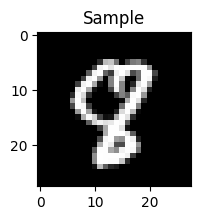

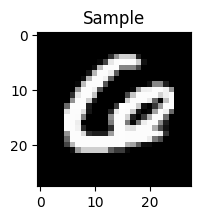

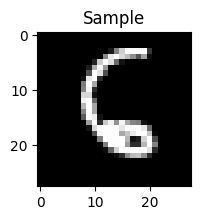

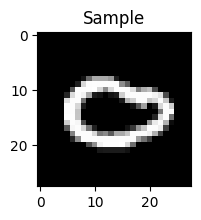

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pylab import *

def imshow(title, image= None, size= 6):
  if image.any():
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize= (size* aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
  else:
    print("<<<< Image not found >>>>")

for i in range(0, 4):
  random_num = np.random.randint(0, len(x_train))
  img = x_train[random_num]
  imshow("Sample", img, size=2)

### lets do the same thing but using matplotlib

<Figure size 640x480 with 0 Axes>

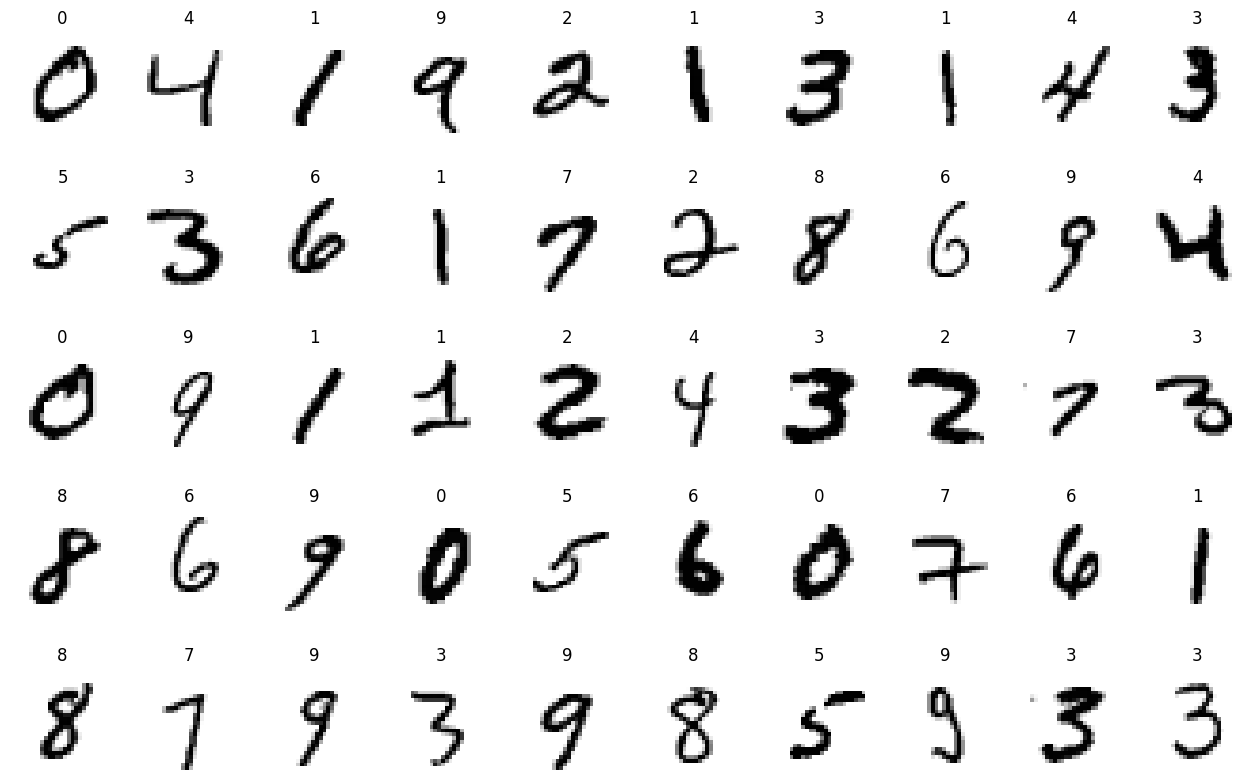

In [ ]:
import matplotlib.pyplot as plt
figure = plt.figure()
plt.figure(figsize = (16, 10))

number_of_images = 50
for index in range (1 , number_of_images+1):
  plt.subplot(5, 10, index).set_title(f'{y_train[index]}')
  plt.axis('off')
  plt.imshow(x_train[index], cmap= 'gray_r')

In [ ]:
# storing the rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# changing the dimension of the data and adding 4 th dimension
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32') # converting to float 32 as it was uint8 originally
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0 # normalize 0-255 into 1 and 0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train_samples')
print(x_test.shape[0], 'test_samples')


x_train shape: (60000, 28, 28, 1)
60000 train_samples
10000 test_samples


# one hot encoding

In [ ]:
from tensorflow.keras.utils import to_categorical
# Now one hot encode input

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print("Number of classes " + str(y_test.shape[1]))
num_classes = y_test.shape[1]
num_pixels = y_train.shape * x_train.shape[2]

Number of classes 10


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape= input_shape))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size= (2, 2)))
model.add(Flatten())
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001),
              metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 10)                92170     
                                                                 
Total params: 110,986
Trainable params: 110,986
Non-trainable params: 0
__________________________________________________

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
batch_size = 128
epoch = 100

history = model.fit(
    x_train,
    y_train,
    batch_size = batch_size,
    epochs = epoch,
    verbose = 1,
    validation_data = (x_test, y_test)
)
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test_loss: ', score[0])
print('Test_accuracy: ', score[1])

Epoch 1/100
469/469 [==============================] - 13s 8ms/step - loss: 2.1936 - accuracy: 0.3874 - val_loss: 2.0276 - val_accuracy: 0.6493
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 1.5772 - accuracy: 0.7349 - val_loss: 0.9844 - val_accuracy: 0.8114
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.7193 - accuracy: 0.8301 - val_loss: 0.5278 - val_accuracy: 0.8630
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.4911 - accuracy: 0.8659 - val_loss: 0.4219 - val_accuracy: 0.8838
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.4217 - accuracy: 0.8804 - val_loss: 0.3770 - val_accuracy: 0.8942
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.3889 - accuracy: 0.8876 - val_loss: 0.3544 - val_accuracy: 0.9015
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.3696 - accuracy: 0.8933 - val_loss: 0.3399 - val_accuracy: 0.905

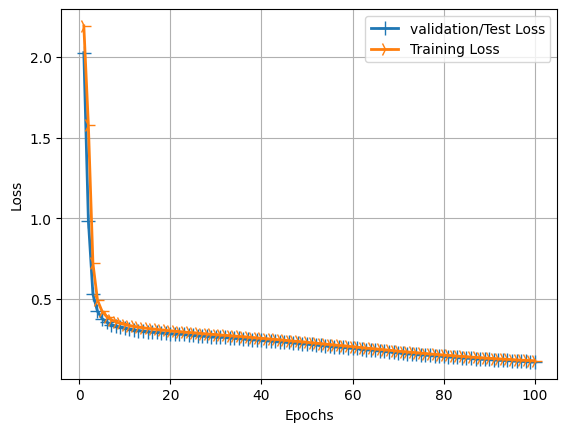

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
line1 = plt.plot(epochs, val_loss_values,  label = 'validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')
plt.setp(line1 , linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2 , linewidth =  2.0, marker = '4', markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
history_dict = history.history
history_dict

{'loss': [2.193573236465454,
  1.5771706104278564,
  0.7193304896354675,
  0.49114853143692017,
  0.4217337965965271,
  0.38894593715667725,
  0.36960774660110474,
  0.3565300405025482,
  0.3468877375125885,
  0.3394624590873718,
  0.3332463502883911,
  0.3278442919254303,
  0.32326188683509827,
  0.3193598687648773,
  0.3155363202095032,
  0.31200140714645386,
  0.3089606761932373,
  0.30579596757888794,
  0.3031366467475891,
  0.3005231022834778,
  0.2978091835975647,
  0.295509397983551,
  0.2930389642715454,
  0.29069769382476807,
  0.2884284555912018,
  0.28637441992759705,
  0.2838938236236572,
  0.2816053628921509,
  0.2795993387699127,
  0.2772347629070282,
  0.2749502956867218,
  0.2727605402469635,
  0.2707326412200928,
  0.2683360278606415,
  0.26607128977775574,
  0.2637905776500702,
  0.26153573393821716,
  0.25909826159477234,
  0.25698405504226685,
  0.25445932149887085,
  0.25208938121795654,
  0.24943408370018005,
  0.24717320501804352,
  0.2445654273033142,
  0.242330

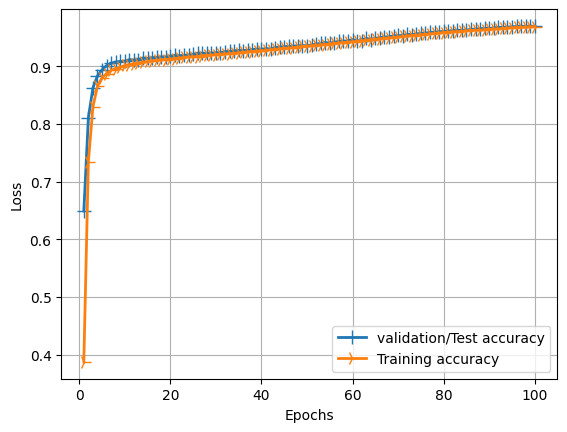

In [ ]:
history_dict = history.history
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values)+1)
line1 = plt.plot(epochs, val_accuracy_values,  label = 'validation/Test accuracy')
line2 = plt.plot(epochs, accuracy_values, label = 'Training accuracy')
plt.setp(line1 , linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2 , linewidth =  2.0, marker = '4', markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
model.save('mnist.h5')

In [ ]:
# using the model to predict the results

In [ ]:
from tensorflow.keras.models import load_model
classifier = load_model('/content/mnist.h5')